In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [5]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features, labels

(tensor([[ 1.4602, -0.3008],
         [-1.7325, -0.6683],
         [ 0.1171, -0.0143],
         ...,
         [ 0.7653,  2.4080],
         [ 0.0724,  0.5649],
         [ 1.3194, -0.9446]]),
 tensor([[ 8.1381e+00],
         [ 3.0113e+00],
         [ 4.4787e+00],
         [ 5.7551e+00],
         [ 2.3560e+00],
         [ 5.9305e+00],
         [ 3.5885e+00],
         [ 2.7929e+00],
         [ 5.8919e+00],
         [ 1.7531e+00],
         [ 8.3386e+00],
         [ 3.1525e+00],
         [ 1.0405e+01],
         [ 3.0593e+00],
         [ 3.7822e+00],
         [ 4.0180e+00],
         [ 1.4450e+00],
         [ 4.9147e+00],
         [-1.9652e+00],
         [ 5.1112e+00],
         [ 8.1490e+00],
         [ 5.9540e+00],
         [ 6.2848e+00],
         [ 8.1051e+00],
         [-1.9373e-01],
         [ 5.3588e+00],
         [ 3.3986e+00],
         [ 2.7411e+00],
         [ 6.9948e+00],
         [ 4.7809e+00],
         [ 8.1561e+00],
         [-6.1768e+00],
         [-1.3396e+00],
         [ 2.8011e

In [6]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 1.4602, -0.3008]) 
label: tensor([8.1381])


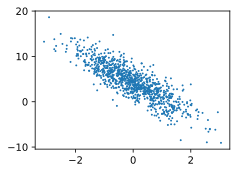

In [9]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)], labels, 1);

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [11]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.8129, -0.5046],
        [-0.5782, -1.2352],
        [-0.1934,  0.8546],
        [-0.7986,  0.0616],
        [ 0.2538,  0.3896],
        [-1.2781, -1.5275],
        [-1.1690, -0.0173],
        [-1.3872, -0.7629],
        [ 0.7874,  1.3538],
        [-0.8061, -1.1984]]) 
 tensor([[7.5252],
        [7.2506],
        [0.9122],
        [2.4074],
        [3.3824],
        [6.8257],
        [1.9326],
        [4.0180],
        [1.1666],
        [6.6746]])


In [12]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [13]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [14]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [15]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [16]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.033235
epoch 2, loss 0.000116
epoch 3, loss 0.000052


In [17]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0004, -0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0003], grad_fn=<RsubBackward1>)
